# Test FZ filter

## Parse AMS PWS data

use code from training school

In [50]:
import pandas as pd

df_data = pd.read_csv('AMS_dataset.zip', sep=',', index_col='Time', parse_dates=True)

df_metadata =  pd.read_csv('AMS_metadata.csv', sep=',', index_col='ID' )
df_metadata.index = 'ams' + df_metadata.index.astype(str)

In [114]:
df_data.head()

,ams1,ams2,ams3,ams4,ams5,ams6,ams7,ams8,ams9,ams10,...,ams125,ams126,ams127,ams128,ams129,ams130,ams131,ams132,ams133,ams134
Time,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:05:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:10:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:15:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:20:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:25:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [52]:
df_metadata.head()

,lon,lat
ID,,
ams1,4.670664,52.305896
ams2,4.674940,52.302044
ams3,4.677275,52.308427
ams4,4.677554,52.346013
ams5,4.678593,52.318572


In [53]:
import scipy


# This isn not correct since we use lon-lat and not projected coordinates...
distance_matrix = scipy.spatial.distance_matrix(df_metadata.values, df_metadata.values)

df_distance_matrix = pd.DataFrame(
    index=df_metadata.index,
    columns=df_metadata.index,
    data=distance_matrix)
df_distance_matrix

ID,ams1,ams2,ams3,ams4,ams5,ams6,ams7,ams8,ams9,ams10,...,ams125,ams126,ams127,ams128,ams129,ams130,ams131,ams132,ams133,ams134
ID,,,,,,,,,,,,,,,,,,,,,
ams1,0.000000,0.005755,0.007079,0.040704,0.014951,0.011353,0.012118,0.024180,0.025316,0.061542,...,0.308785,0.313675,0.328607,0.347164,0.359986,0.360168,0.361374,0.385974,0.370516,0.376754
ams2,0.005755,0.000000,0.006797,0.044046,0.016927,0.005621,0.006418,0.018568,0.019796,0.056255,...,0.304804,0.310169,0.323730,0.344538,0.355295,0.355992,0.357133,0.383216,0.366216,0.372086
ams3,0.007079,0.006797,0.000000,0.037587,0.010230,0.010729,0.011604,0.020569,0.021293,0.061349,...,0.302027,0.306727,0.322570,0.340086,0.353740,0.353516,0.354762,0.378900,0.363943,0.370485
ams4,0.040704,0.044046,0.037587,0.000000,0.027460,0.048244,0.049104,0.054316,0.054103,0.097571,...,0.301831,0.302333,0.331443,0.328602,0.360238,0.354735,0.356594,0.368147,0.366294,0.376626
ams5,0.014951,0.016927,0.010230,0.027460,0.000000,0.020792,0.021648,0.028167,0.028374,0.070644,...,0.300270,0.303860,0.323348,0.335435,0.353886,0.352210,0.353623,0.374472,0.362956,0.370549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ams130,0.360168,0.355992,0.353516,0.354735,0.352210,0.352492,0.352321,0.339903,0.338175,0.339130,...,0.053712,0.069835,0.075021,0.119078,0.050289,0.000000,0.005999,0.118414,0.015446,0.051664
ams131,0.361374,0.357133,0.354762,0.356594,0.353623,0.353560,0.353375,0.340889,0.339172,0.339353,...,0.056668,0.074834,0.070643,0.125058,0.044532,0.005999,0.000000,0.124227,0.010683,0.045680
ams132,0.385974,0.383216,0.378900,0.368147,0.374472,0.381245,0.381350,0.370836,0.369007,0.383550,...,0.119311,0.090380,0.188397,0.039884,0.168700,0.118414,0.124227,0.000000,0.129853,0.168231


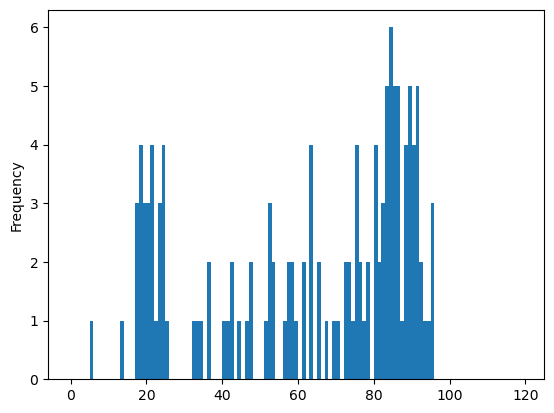

In [54]:
(df_distance_matrix < 0.1).sum().plot.hist(bins=np.arange(0, 120));

## Select one PWS and its neigbours within certain radius

In [93]:
pws_id = 'ams2'

neighbors_within_distance =  df_distance_matrix[pws_id] < 0.1 # note that this is in degeree lon-lat currently...

neighbor_ids = df_distance_matrix.index.values[neighbors_within_distance]
neighbor_ids

array(['ams1', 'ams2', 'ams3', 'ams4', 'ams5', 'ams6', 'ams7', 'ams8',
       'ams9', 'ams10', 'ams11', 'ams12', 'ams13', 'ams14', 'ams15',
       'ams19', 'ams20', 'ams21'], dtype=object)

In [94]:
n1 = 143999
n2 = 144036

df_selected = df_data[pws_id][n1:n2]
df_neighbors = df_data[neighbor_ids][n1:n2]

In [116]:
df_selected.head()

Time
2017-09-13 00:00:00    0.0
2017-09-13 00:05:00    0.0
2017-09-13 00:10:00    0.0
2017-09-13 00:15:00    0.0
2017-09-13 00:20:00    0.0
Name: ams2, dtype: float64

In [120]:
df_neighbors.median(axis=1).head()

Time
2017-09-13 00:00:00    0.101000
2017-09-13 00:05:00    0.251361
2017-09-13 00:10:00    0.101043
2017-09-13 00:15:00    0.000000
2017-09-13 00:20:00    0.050120
dtype: float64

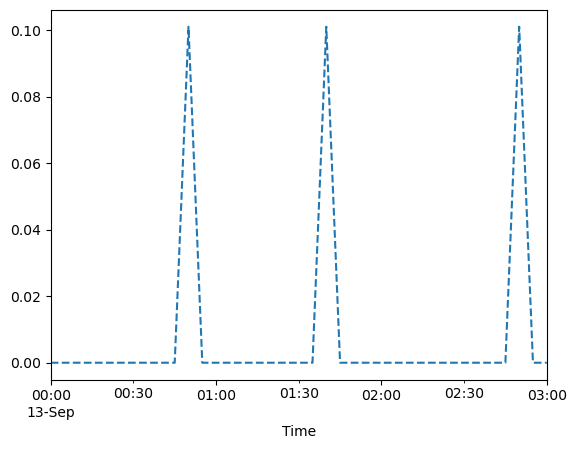

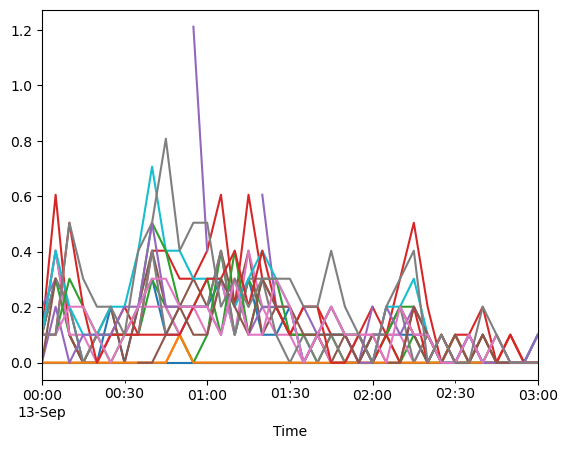

In [95]:
df_selected.plot(linestyle='--')
df_neighbors.plot(legend=False);

## run FZ filter code from training school

In [124]:
import numpy as np

def FZ_filter(pws_data, reference, nint=6):
    
    Ref_array=np.zeros(np.shape(pws_data))
    Ref_array[np.where(reference>0)]=1
    
    Sensor_array=np.zeros(np.shape(pws_data))
    Sensor_array[np.where(pws_data>0)]=1
    Sensor_array[np.where(pws_data==0)]=0
    
    FZ_array=np.ones(np.shape(pws_data))*-1

    for i in np.arange(nint,np.shape(pws_data)[0]):
        #print(i)
        if len(np.ma.compressed(Ref_array[i]))==0: #als de vergelijkende waarde niet bestaat:
                FZ_array[i]=-1
        elif len(np.ma.compressed(Sensor_array[i]))==0: #als de meting een NAN is, dan vorige meting overnemen
                FZ_array[i]=FZ_array[i-1]
        else: #als er genoeg goede metingen zijn:
            if Sensor_array[i]>0: #als er regen valt, geen FZ vlag
                FZ_array[i]=0
            else:
                if FZ_array[i-1]==1: #als er geen regen valt en vorige meting ook al FZ, dan wederom afvlaggen
                    FZ_array[i]=1
                elif np.sum(Sensor_array[i-nint:i+1]) >0: #als er geen regen valt, maar ergens in het voorgaande wel: neit afvlaggen
                    FZ_array[i]=0
                else: #als er een serie nullen is van nint lengte
                    if np.sum(Ref_array[i-nint:i+1]) <nint+1: #als de radar ook minstens af en toe nul of aangeeft: dan is alles prima, of is bepaald zonder nstat stations
                        FZ_array[i]=0
                    else: #dus als de sensor nul aangeeft, maar de radar niet nul (continu) in die periode
                        FZ_array[i]=1
     
    return FZ_array 

In [128]:
df_selected.values

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.101, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.101, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.101, 0.   ,
       0.   ])

In [131]:
df_neighbors.median(axis=1).values

array([0.101     , 0.25136087, 0.1010425 , 0.        , 0.05012029,
       0.101     , 0.101     , 0.101     , 0.303     , 0.20048115,
       0.202     , 0.202     , 0.202     , 0.303     , 0.202     ,
       0.202     , 0.202     , 0.202     , 0.101     , 0.05012029,
       0.101     , 0.10062029, 0.0505    , 0.        , 0.        ,
       0.101     , 0.101     , 0.101     , 0.0505    , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [134]:
fz_filter_results = FZ_filter(
    pws_data=df_selected.values, 
    reference=df_neighbors.median(axis=1).values,
    nint=6,
)
fz_filter_results

array([-1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

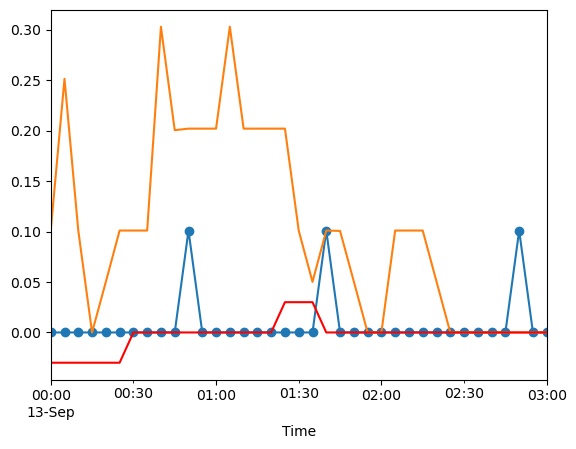

In [126]:
df_selected.plot(marker='o')
df_neighbors.median(axis=1).plot()

df_fz_filter_results = pd.Series(index=df_selected.index, data=fz_filter_results)
(0.03 * df_fz_filter_results).plot(color='r');

# Check what `np.ma.compressed` does

In [140]:
# Set up a simple array with a NaN
x = np.array([0.1, 0.2, 0.1 , np.NaN , 0.0])
x

array([0.1, 0.2, 0.1, nan, 0. ])

In [145]:
# This just returns the NaN at index 3
np.ma.compressed(x[3])

array([nan])

In [147]:
# As a results, length is 1
len(np.ma.compressed(x[3]))

1

In [158]:
# Now create a "masked" array with the NaN at index 3 masked out
x_masked = np.ma.array(x, mask=np.isnan(x))
x_masked

masked_array(data=[0.1, 0.2, 0.1, --, 0.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

In [159]:
# Now an empty array is returned at index 3
np.ma.compressed(x_masked[3])

array([], dtype=float64)

In [160]:
# As a results, length is now 0 here
len(np.ma.compressed(x_masked[3]))

0

# Test indicator correlation code

In [1]:
!curl -OL https://github.com/OpenSenseAction/OS_data_format_conventions/raw/main/notebooks/data/OpenSense_PWS_example_format_data.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4182k  100 4182k    0     0  4963k      0 --:--:-- --:--:-- --:--:-- 4963k


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ds_pws = xr.open_dataset("OpenSense_PWS_example_format_data.nc")

In [4]:
# # fix some issues with this dataset
# ds_pws["time"] = pd.to_datetime(ds_pws.time.data, unit="s")
# ds_pws["lon"] = ("id", ds_pws.lon.data)
# ds_pws["lat"] = ("id", ds_pws.lat.data)

In [5]:
#########################
# This is the updated calc_indicator_correlation function
########################

def calc_indicator_correlation(a_dataset, b_dataset, prob, exclude_nan=True, min_valid_overlap=None):
    """
    To calcualte indicator correlation two datasets

    Parameters
    ----------
    a_dataset: first data vector
    b_dataset: second data vector
    perc: percentile threshold 
    
    Returns
    ----------
    indicator correlation value

    Raises
    ----------

    """

    if len(a_dataset.shape) != 1:
        raise ValueError('`a_dataset` has to be a 1D numpy.ndarray')
    if a_dataset.shape != b_dataset.shape:
        raise ValueError('`a_dataset` and `b_dataset` have to have the same shape')
    
    a_dataset = np.copy(a_dataset)
    b_dataset = np.copy(b_dataset)

    both_not_nan = ~np.isnan(a_dataset) & ~np.isnan(b_dataset)
    if exclude_nan:
        a_dataset = a_dataset[both_not_nan]
        b_dataset = b_dataset[both_not_nan]

    if min_valid_overlap is not None:
        if sum(both_not_nan) < min_valid_overlap:
            return np.nan
    else:
        if sum(both_not_nan) == 0:
            raise ValueError('No overlapping data. Define `min_valid_overlap` to return NaN in such cases.')

    # Get index at quantile threshold `prob`
    ix = int(a_dataset.shape[0] * prob)

    # Set values below quantile threshold `prob` to 0
    # and above to 1
    a_sort = np.sort(a_dataset)
    b_sort = np.sort(b_dataset)
    a_dataset[a_dataset < a_sort[ix]] = 0
    b_dataset[b_dataset < b_sort[ix]] = 0
    a_dataset[a_dataset > 0] = 1
    b_dataset[b_dataset > 0] = 1

    # Calcualte correlation of 0 and 1 time series
    cc = np.corrcoef(a_dataset, b_dataset)[0, 1]

    return cc


####################3
# This is the untouched function from the training school
#####################33

def calc_indic_corr_all_stns(coords_stns_xy,
                             pcp_vals,
                            max_distance=50000,
                            min_req_ppt_vals=2*24*30, prob=0.99):

    """
    Indicator correlation between reference and test stations
    
    return: indicator correlation and distance values
    
    """
    
    dist_mtx = scsp.distance.cdist(coords_stns_xy, coords_stns_xy,
                                              metric='euclidean')
    
    list_corr = []
    list_dist = []
    for i in tqdm.tqdm(range(len(coords_stns_xy) - 1)):
        #print(i, len(coords_stns_xy))
        pcp_vals[:, i][pcp_vals[:, i] == -9] = np.nan
        i_bool_avail_data = np.isnan(pcp_vals[:, i])
        # i_avail_data = prc_dwd[np.invert(i_bool_avail_data), i]
        for j in range(i + 1, len(coords_stns_xy)):
            # check if distance between stations is less than max_distance
            if dist_mtx[i, j] < max_distance:
                # check data availability for both stations
                pcp_vals[:, j][pcp_vals[:, j] == -9] = np.nan
                j_bool_avail_data = np.isnan(pcp_vals[:, j])
                ij_bool_avail_data = np.sum(
                    [i_bool_avail_data, j_bool_avail_data], axis=0) == 0
                # check if sufficient number of data available
                if ij_bool_avail_data.sum() > min_req_ppt_vals:
                    # TODO check function
                    indi_corr = calc_indicator_correlation(
                        pcp_vals[ij_bool_avail_data, i],
                        pcp_vals[ij_bool_avail_data, j],
                        prob=prob)
                    #if indi_corr > 0.:
                    list_dist.append(dist_mtx[i, j])
                    list_corr.append(indi_corr)
    dist_vals = np.asarray(list_dist)
    corr_vals = np.asarray(list_corr) 
    
    return dist_vals, corr_vals



In [6]:
#############################
# This is the very much simplified version of the above functions
############################

def calc_indic_corr_all_stns_new(
    da_a,
    da_b,
    max_distance=50000, # this is in meters, assuming the projection units are also meters
    prob=0.99, 
    exclude_nan=True, 
    min_valid_overlap=None,
):

    """
    Indicator correlation between reference and test stations
    
    return: indicator correlation and distance values
    
    """
    import scipy
    xy_a = list(zip(da_a.x.data, da_a.y.data))
    xy_b = list(zip(da_b.x.data, da_b.y.data))
    dist_mtx = scipy.spatial.distance.cdist(xy_a, xy_b, metric='euclidean')
    
    list_corr = []
    list_dist = []
    for i in tqdm.tqdm(range(len(xy_a) - 1)):
        for j in range(i + 1, len(xy_b)):
            # check if distance between stations is less than max_distance
            if dist_mtx[i, j] < max_distance:
                indi_corr = calc_indicator_correlation(
                    da_a.isel(id=i).data, 
                    da_b.isel(id=j).data,
                    prob=prob,
                    exclude_nan=exclude_nan, 
                    min_valid_overlap=min_valid_overlap,
                )
                list_dist.append(dist_mtx[i, j])
                list_corr.append(indi_corr)
    dist_vals = np.asarray(list_dist)
    corr_vals = np.asarray(list_corr) 
    
    return dist_vals, corr_vals


In [7]:
import poligrain as plg

In [8]:
ds_pws = ds_pws.load()

In [9]:
ds_pws.coords['x'], ds_pws.coords['y'] = plg.spatial.project_point_coordinates(
    ds_pws.longitude, ds_pws.latitude, target_projection="EPSG:25832",
)

In [10]:
import tqdm

In [11]:
dist_vals, corr_vals = calc_indic_corr_all_stns_new(
    ds_pws.rainfall.resample(time='1H').sum(min_count=10), 
    ds_pws.rainfall.resample(time='1H').sum(min_count=10), 
    prob=0.99,
    min_valid_overlap=2*24*30,
)

  0%|                                                                                                                                                                                | 0/133 [00:00<?, ?it/s]/Users/chwala-c/mambaforge/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/chwala-c/mambaforge/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:21<00:00,  6.24it/s]


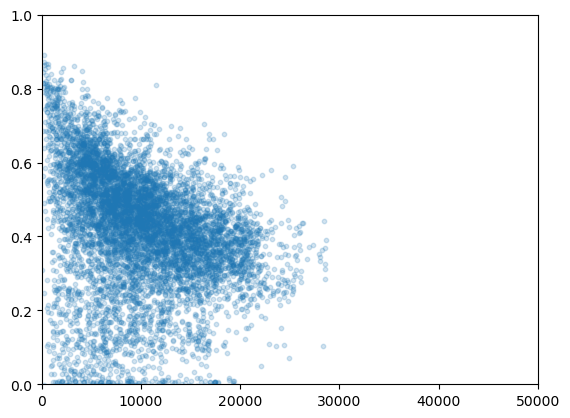

In [12]:
plt.scatter(dist_vals, corr_vals, alpha=0.2, s=10)
plt.ylim(0, 1)
plt.xlim(0, 50e3);

## testing...

In [451]:
data_a = ds_pws.rainfall.isel(id=0).data
data_b = ds_pws.rainfall.isel(id=1).data

In [452]:
calc_indicator_correlation(data_a, data_b, prob=0.99)

0.6193778098955425

In [455]:
%%timeit
calc_indicator_correlation(data_a, data_b, prob=0.99)

22.5 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [456]:
%%timeit
calc_indicator_correlation(ds_pws.rainfall.isel(id=0).data, ds_pws.rainfall.isel(id=1).data, prob=0.99)

21.5 ms ± 965 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [409]:
data_a = ds_pws.rainfall.isel(id=3).data
data_b = ds_pws.rainfall.isel(id=65).data
calc_indicator_correlation(data_a, data_b, prob=0.99, min_valid_overlap=None)

IndexError: index 0 is out of bounds for axis 0 with size 0

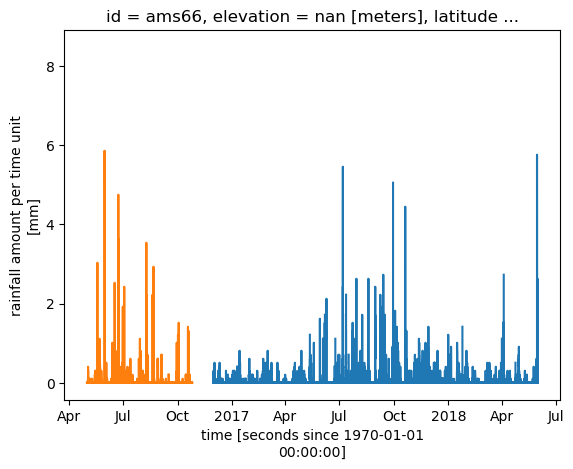

In [405]:
ds_pws.rainfall.isel(id=3).plot()
ds_pws.rainfall.isel(id=65).plot()

In [327]:
N = 1000
a = np.random.randn(N, 2)
b = np.random.randn(N, 2)

cdist = scipy.spatial.distance.cdist(a, b)
distance_matrix = scipy.spatial.distance_matrix(a, b)

In [329]:
cdist == distance_matrix

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [311]:
calc_indicator_correlation(data_a, data_b, prob=0.99, min_valid_overlap=30)

0.6193778098955425

In [310]:
calc_indicator_correlation(data_a, data_b, prob=0.99, min_valid_overlap=len(data_a))

nan

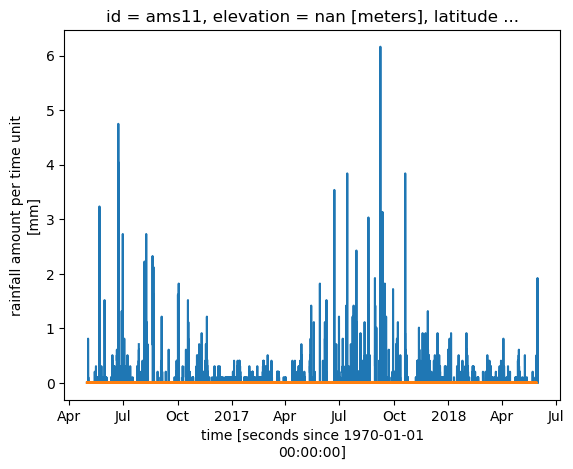

In [293]:
ds_pws.rainfall.isel(id=0).plot()
ds_pws.rainfall.isel(id=10).plot()

In [320]:
%%time
import scipy
N = 10000
scipy.spatial.distance_matrix(np.random.randn(N, 2), np.random.randn(N, 2))

CPU times: user 3.1 s, sys: 274 ms, total: 3.38 s
Wall time: 3.38 s


array([[3.43074646, 1.72918818, 2.8375727 , ..., 3.47238795, 1.51775413,
        1.79648602],
       [3.02208948, 1.29512884, 0.99265716, ..., 1.71015833, 1.57175403,
        1.55183496],
       [2.39154813, 1.85548394, 1.29695531, ..., 1.62937587, 1.0783131 ,
        2.10433911],
       ...,
       [3.83116266, 1.44430252, 0.60419746, ..., 1.60294329, 2.60579817,
        1.6515654 ],
       [5.41379864, 1.24147971, 2.94856458, ..., 3.95431897, 3.58848593,
        0.99397617],
       [2.24633965, 2.30399514, 2.52752171, ..., 2.82917203, 0.36183484,
        2.48104401]])

In [332]:
%%time
import scipy
N = 10000
scipy.spatial.distance.cdist(np.random.randn(N, 2), np.random.randn(N, 2))

CPU times: user 349 ms, sys: 229 ms, total: 578 ms
Wall time: 585 ms


array([[0.32090517, 2.42489618, 0.71261399, ..., 1.64704303, 0.97688356,
        1.002832  ],
       [2.11073205, 0.70357862, 2.54194596, ..., 1.5682283 , 1.86900489,
        0.87377834],
       [2.85692013, 2.35150637, 3.18712744, ..., 3.34379542, 2.08199681,
        2.15093512],
       ...,
       [0.65054998, 2.08326424, 1.05842006, ..., 1.36472407, 1.06501893,
        0.6922951 ],
       [3.1086909 , 0.88953606, 3.53608789, ..., 2.42636464, 2.72067313,
        1.89636238],
       [1.13072047, 3.43354734, 1.02638256, ..., 3.04360697, 0.88660947,
        2.01952497]])

# Station outlier filter brainstorming

Below is Python code, stemming from a MATLAB implementation of Lotte's R code.

This code is not meant to run!!!

We added some comments for explanation

In [ ]:
# Default Bias Correction
dbc = 1
# SO filter
tt = time.time()
if not os.path.isfile(sofile):
    SOfilter = FZfilter
    SOfilter[:, :] = 0
    BCF = SOfilter
    BCF[:, :] = dbc
    idx_posrain = netatmo_hour # 2D array (id, time) of rainfall values
    idx_posrain[:, :] = idx_posrain[:, :] > 0
    for i in range(netatmo_hour.shape[1]): # loop over sensor id
        tt2 = time.time()
        # one bias correction factor per station, which will be updated at the end of this code block
        BCF_prev = dbc
        cum_raintime = np.cumsum(idx_posrain[:, i])
        for k in range(mint, netatmo_hour.shape[0]): # loop over time
            # IMO this is mainly doing a rolling PCC and a rolling bias
            # ...
            #
            if time.time() - tt > 10: # every now and then print some info
                tt = time.time()
                print('Station:', i, 'af 1635, Tidsskridt:', k, 'af 10995')
            # What exaxtly is this doing?
            # mrain = 100 (in Lotte's paper), threshold for minimum number of non-zero rainfall
            # mint = 4032, taken from Lottes paper which works with 5-minute data, i.e. mint = two weeks
            if cum_raintime[k] - cum_raintime[k - mint + 1] >= mrain:
                idx_rain_start = k - mint + 1
                idx_rain_end = k
            else:
                # move start index far enough back in time so that we have mrain rainy time steps
                idx_rain_start = np.where(cum_raintime == (cum_raintime[k] - mrain))[0][0]
                idx_rain_end = k
            neighbors = np.where(idx_dist[:, i] > 0)[0]
            posrain = np.where(idx_posrain[idx_rain_start:idx_rain_end, i] == 1)[0]
            matches = np.sum(idx_posrain[posrain, neighbors])
            # not apply SO if not nstat stations with mmatch intervals
            if matches < mmatch:
                SOfilter[k, i] = -1
            else:
                r_values = np.zeros(len(neighbors))
                bias_values = np.zeros(len(neighbors))
                for j in range(len(neighbors)): 
                    # correlation for certain length of rain event between station and one neigbor
                    r = np.corrcoef(
                        netatmo_hour[idx_rain_start:idx_rain_end, i], 
                        netatmo_hour[idx_rain_start:idx_rain_end, neighbors[j]],
                    )                 
                    r_values[j] = r[0, 1]
                    # time of the difference in that event
                    deltaR = (
                        netatmo_hour[idx_rain_start:idx_rain_end, i] 
                        - netatmo_hour[idx_rain_start:idx_rain_end, neighbors[j]]
                    )
                    # diff / rain_value_neibor
                    bias = np.nanmean(deltaR) / np.nanmean(netatmo_hour[idx_rain_start:idx_rain_end, neighbors[j]])
                    bias_values[j] = bias
                med_r = np.median(r_values) # median PCC off PCCs with all neighbors
                # if the correlation with neighbors is large enough, we calculate a new bias correction factor
                if med_r > gamma:
                    bias_values[np.isinf(bias_values)] = np.nan
                    med_bias = np.nanmedian(bias_values) # median of bias of indivial bias to all neigbors
                    BCFnew = 1 / (1 + med_bias)
                    if np.abs(np.log(BCFnew / BCF_prev)) > np.log(1 + beta):
                        BCF_prev = BCFnew
                # if PCC is too low, then it is a "station outlier"
                else:
                    SOfilter[k, i] = 1
            BCF[k, i] = BCF_prev
        toc(tt2)
    np.savez_compressed(sofile, SOfilter=SOfilter)
    np.savez_compressed(bcffile, BCF=BCF)
else:
    data = np.load(sofile)
    SOfilter = data['SOfilter']
    data = np.load(bcffile)
    BCF = data['BCF']

## draft of a function to do that

In [ ]:
def station_outlier_filter():
    """
    parameteres
    -----------

    ds_pws.rainfall
    ds_other_sensor.rainfall (maybe, if there is such a use case)
    distance_matrix (maybe)
    mint, nint, mrain

    returns
    -------
    station_outlier_flag 2D xr.DataArray (id, time)
    bias_factor 2D xr.DataArray(id, time)
    
    """
    
